In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('FuelConsumption (1).csv')

In [3]:
df.dropna(inplace=True)


In [4]:
df = pd.get_dummies(df, columns=['FUEL', 'TRANSMISSION', 'VEHICLE CLASS', 'MAKE'], drop_first=True)


In [5]:
X = df.drop(['COEMISSIONS ', 'MODEL'], axis=1)
y = df['COEMISSIONS ']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()


In [10]:
model = SVR(kernel='rbf', C=100, epsilon=0.1)
model.fit(X_train_scaled, y_train_scaled)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [11]:
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()


In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n✅ SVR Model Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score (Accuracy-like): {r2:.4f} ({r2*100:.2f}%)")



✅ SVR Model Results:
Mean Absolute Error (MAE): 10.52
Mean Squared Error (MSE): 513.74
R² Score (Accuracy-like): 0.9019 (90.19%)


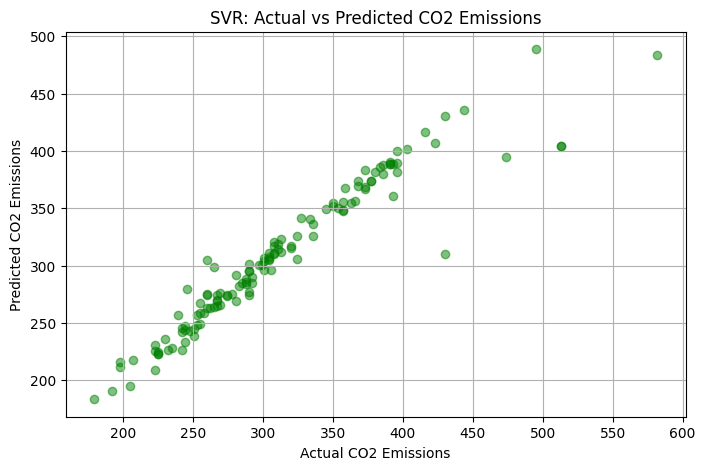

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('SVR: Actual vs Predicted CO2 Emissions')
plt.grid(True)
plt.show()